# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `helper_functions`: Objects with all the functions.

In [1]:
sys.path.append("..")
import warnings
from imp import reload
from pathlib import Path

from sklearn.linear_model import LogisticRegression

from helper_functions import data_utils, ml_model, preprocessing

warnings.filterwarnings("ignore", category=FutureWarning)

/tmp/ipykernel_77064/2301966691.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


## Load normalized data set


In this notebook, we are going to encode a previously normalized `dataset` followed by the creation of the `ML` model.

In [2]:
app_normalized = data_utils.get_normalized_model()
app_normalized['TARGET_LABEL_BAD=1'] = app_normalized.pop('TARGET_LABEL_BAD=1')
app_normalized = preprocessing.categorical_columns(app_normalized)

In [3]:
app_normalized.head()

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,FLAG_PROFESSIONAL_PHONE,...,AGE,PAYMENT_DAY_C,PERSONAL_MONTHLY_INCOME_LEVEL,EXTRA_INCOME,FLAG_CARDS,HAS_BANKING_ACCOUNTS,HAS_SPECIAL_BANKING_ACCOUNTS,HAS_PERSONAL_ASSETS,HAS_CARS,TARGET_LABEL_BAD=1
0,1,3,1,1,RN,Y,1 - 2 years,1,N,Y,...,32,1 - 14,501 - 1000,N,Y,N,N,N,0,1
1,1,2,0,1,RJ,Y,< 1 year,1,Y,Y,...,34,15 - 30,501 - 1000,N,N,N,N,N,0,1
2,1,2,0,1,RN,Y,1 - 2 years,1,N,Y,...,27,1 - 14,< 500,N,N,N,N,N,0,0
3,1,2,0,1,PE,N,1 - 2 years,1,N,N,...,61,15 - 30,< 500,N,N,N,N,N,0,0
4,1,2,0,1,RJ,Y,< 1 year,1,N,Y,...,48,1 - 14,1001 - 1500,N,N,N,N,N,0,1


In [4]:
print(app_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   POSTAL_ADDRESS_TYPE            50000 non-null  category
 1   MARITAL_STATUS                 50000 non-null  category
 2   QUANT_DEPENDANTS               50000 non-null  category
 3   NACIONALITY                    50000 non-null  category
 4   RESIDENCIAL_STATE              50000 non-null  category
 5   FLAG_RESIDENCIAL_PHONE         50000 non-null  category
 6   MONTHS_IN_RESIDENCE            50000 non-null  category
 7   FLAG_EMAIL                     50000 non-null  category
 8   COMPANY                        50000 non-null  category
 9   FLAG_PROFESSIONAL_PHONE        50000 non-null  category
 10  OCCUPATION_TYPE                50000 non-null  category
 11  PRODUCT                        50000 non-null  category
 12  AGE                            5

### Encoding

- we encode data to convert categorical variables into numerical values so that they can be easily fitted to a machine learning model. 

- Pandas has its own function for encoding:
    - `get_dummies`: It creates a new binary column for each unique value in the categorical variable, where a value of 1 indicates that the original column contained that value, and 0 indicates that it did not


* Some of the encoding techniques offered by category_encoders are:
    - `One-Hot Encoding:` Encoding using the One-Hot Encoding method.
    - `Ordinal Encoding:` Ordinal encoding, where ordinal labels are assigned to categories.
    - `Binary Encoding:` Base-2 encoding to reduce dimensionality in categorical variables with multiple categories.
    - `BaseN Encoding:` Base-N encoding to reduce dimensionality in categorical variables with multiple categories.
    - `Target Encoding:` Encoding using the target variable to assign values to categories.
    - `CatBoost Encoding:` Specific encoding for working with the CatBoost algorithm.

In [5]:
app_dum = ml_model.encoding(app_normalized, True) # True for pandas get_dummies
# app_enc = ml_model.encoding(app_normalized, False) # False for different encoder

In [6]:
print(app_dum.columns)

Index(['POSTAL_ADDRESS_TYPE_2', 'MARITAL_STATUS_2', 'MARITAL_STATUS_3',
       'QUANT_DEPENDANTS_1', 'QUANT_DEPENDANTS_2', 'QUANT_DEPENDANTS_3',
       'QUANT_DEPENDANTS_4', 'NACIONALITY_2', 'RESIDENCIAL_STATE_AL',
       'RESIDENCIAL_STATE_AM',
       ...
       'PERSONAL_MONTHLY_INCOME_LEVEL_1501 - 2000',
       'PERSONAL_MONTHLY_INCOME_LEVEL_501 - 1000',
       'PERSONAL_MONTHLY_INCOME_LEVEL_< 500', 'EXTRA_INCOME_Y', 'FLAG_CARDS_Y',
       'HAS_BANKING_ACCOUNTS_Y', 'HAS_SPECIAL_BANKING_ACCOUNTS_Y',
       'HAS_PERSONAL_ASSETS_Y', 'HAS_CARS_1', 'TARGET_LABEL_BAD=1'],
      dtype='object', length=147)


#### get accepted samples

In [15]:
X_train, y_train, X_test, y_test, X_val, y_val = data_utils.get_feature(app_dum) 
X_train_reshape, y_train_reshape = data_utils.resampling(X_train, y_train)

In [16]:
logistic_model = LogisticRegression(penalty='l2', solver='sag', multi_class='auto', max_iter=500)

In [17]:
logistic_model.fit(X_train_reshape, y_train_reshape)

LogisticRegression(max_iter=500, solver='sag')

In [19]:
res_clases_val = logistic_model.predict(X_val)

In [20]:
X_val_full = X_val.copy()
X_val_full["class"] = res_clases_val

In [40]:
X_val_full[X_val_full["class"]==0].head(1).T.iloc[50:150,:]

,30825
AGE_18,False
AGE_19,False
AGE_20,False
AGE_21,False
AGE_22,False
...,...
HAS_BANKING_ACCOUNTS_Y,False
HAS_SPECIAL_BANKING_ACCOUNTS_Y,False
HAS_PERSONAL_ASSETS_Y,False
HAS_CARS_1,False


Best Score for Logistic Regression:  0.5870711812692583
model score for Logistic Regression: 0.579


Model Performance metrics:
------------------------------
Accuracy: 0.5750475618303795
Precision: 0.8043939101946425
Recall: 0.5638254761583142
F1 Score: 0.6629606099110547

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.56      0.66      7403
           1       0.33      0.61      0.43      2584

    accuracy                           0.58      9987
   macro avg       0.57      0.59      0.54      9987
weighted avg       0.68      0.58      0.60      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4174  3229
1  1015  1569


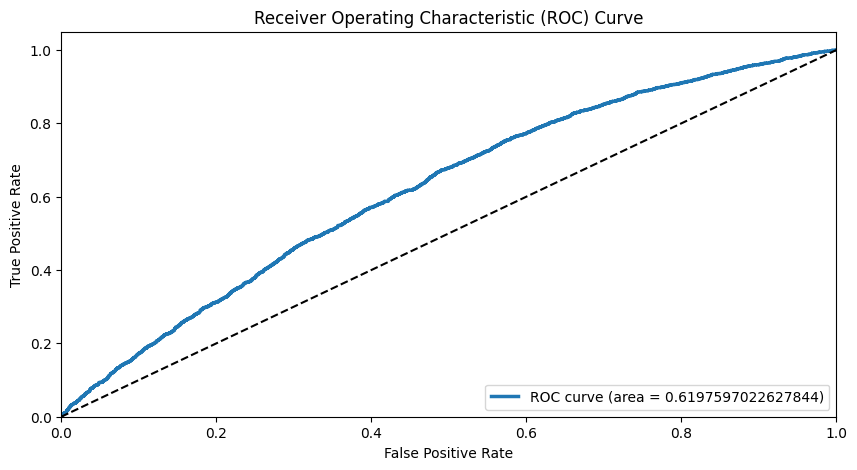

Best Score for Logistic Regression:  0.5870711812692583


In [7]:
# using get_dummies
lr_model_enc = ml_model.model_logistic_regression(app_dum, True)

Best Score for CatBoost Classifier:  0.5847721421199059
Model score for CatBoost Classifier: 0.560


Model Performance metrics:
------------------------------
Accuracy: 0.5526184039251026
Precision: 0.8052839608903682
Recall: 0.5228961231933
F1 Score: 0.6340704340704342

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      0.52      0.63      7403
           1       0.32      0.64      0.42      2584

    accuracy                           0.55      9987
   macro avg       0.56      0.58      0.53      9987
weighted avg       0.68      0.55      0.58      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  3871  3532
1   936  1648


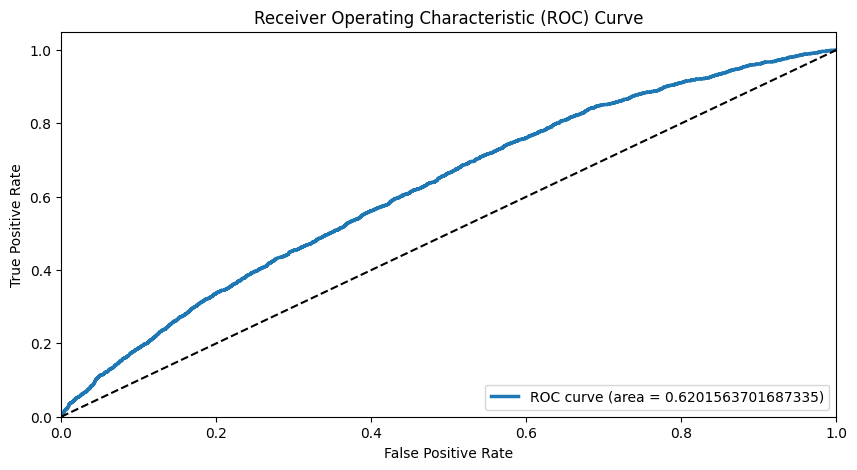

Best Score for CatBoost Classifier:  0.5847721421199059


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002B20A095420>,
             param_grid={'depth': [4, 6, 8], 'learning_rate': [0.01, 0.1, 0.2]})

In [8]:
ml_model.model_catboost_classifier(app_dum, True)

### Comparing different models

#### MSE VS R²

In [9]:
# reload(preprocessing)
# ml_model.basic_models(app_dum)

```
 |                   Model|       MSE|        R²
0|       Linear Regression|  0.239810| -0.250364
1|     Logistic Regression|  0.425053| -1.216218
2|     KNeighborsRegressor|  0.286204| -0.492264
3|    Gaussian Naive Bayes|  0.471012| -1.455852
4|  Multi Layer Perceptron|  0.306286| -0.596973
5|                CatBoost|  0.187573|  0.022000
6|        Ridge Regression|  0.239738| -0.249988
7|        LASSO Regression|  0.250000| -0.303496
8|          Decission Tree|  0.467938| -1.439824
9|           Random Forest|  0.270495| -0.410358
```

- The Mean Squared Error (MSE) measures the average of squared errors between the predicted values and the actual values. A lower MSE indicates better accuracy, as it means the model's predictions are closer to the actual values.

- R² (R-squared) is a metric that indicates the proportion of variance in the target variable that is explained by the predictor variables. It provides an indication of how well the model fits the data. A negative R² value suggests that the model does not fit the data well.

- Among the models listed, CatBoost seems to perform the best. It has the lowest MSE (0.187573) and the highest R² (0.022000). This indicates that CatBoost has achieved the best balance between accuracy and explanatory power compared to the other models.

- It's important to note that the evaluation metrics can vary depending on the specific dataset and the problem being solved. It's always a good practice to cross-validate the models and consider other factors, such as interpretability and computational cost, when choosing the best model for your particular problem.





